# Plotting with GaussianProcesses.jl

GaussianProcesses.jl provides recipes for plotting one and two-dimensional gaussian processes using the [Plots.jl](https://juliaplots.github.io/) package. Plots.jl provides a general interface for plotting with several different backends including PyPlot, Plotly and GR.

Currently plotting is only supported for GPE objects i.e. Gaussian processes with Gaussian likelihood functions.

Plots.jl is not a dependency of GaussianProcesses.jl as the plotting functionality is implemented through the skeleton package RecipesBase.jl. To plot a GP object one must therefore first install and load the Plots.jl package:

In [1]:
isa(Pkg.installed("Plots"), Void) && Pkg.add("Plots") # Install Plots.jl if not already installed

using Plots

Plotting backends such as PyPlot.jl, may also have to be installed manually.

Once a GPE object is constructed, the `plot` command can be used to plot the mean function of the Gaussian process. The user can modify attributes of the plot such as the axis labels with the usual optional keyword arguments:


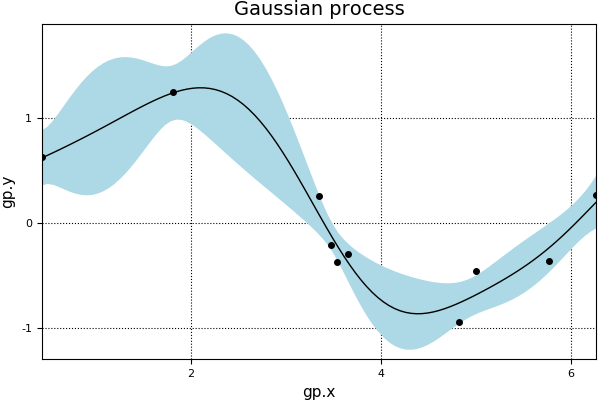

In [2]:
using GaussianProcesses
pyplot()   # Optionally select a plotting backend

# Generate random data for Gaussian process
x = 2π * rand(10)
y = sin.(x) + 0.5*rand(10)

# Set-up mean and kernel
se = SE(0.0, 0.0)
m = MeanZero()

# Construct and plot GP
gp = GP(x,y,m,se)
plot(gp;  xlabel="gp.x", ylabel="gp.y", title="Gaussian process", legend=false, fmt=:png)

By default, the plot command plots the with a ribbon representing 95% confidence interval on the output observations, and with the observation points. These aspects be controlled with the following special additional keyword arguments:
    - β (default=0.95) : level of confidence band plotted with mean (set to 0.0 for no band)
    - obsv (default=true) : plot observations with mean function
    
Note that not all plotting backends are able to plot the confidence band. Specifically, only those which support the ribbon attribute can plot the confidence band. See [here](https://juliaplots.github.io/supported/) for tables detailing which backends support which series types and attributes.

Plots.jl allows the user to modify and combine plots in complicated ways. The following plots a fitted Gaussian process with sampled processes.


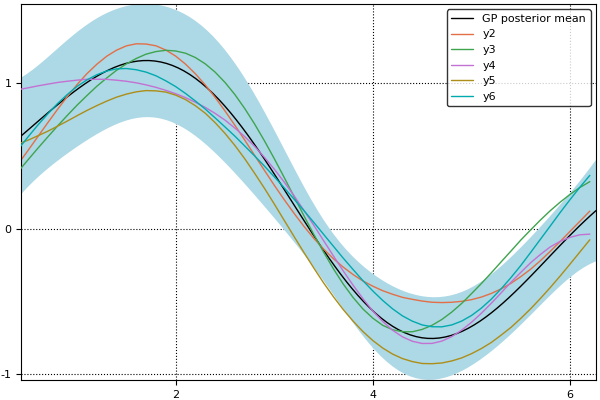

In [3]:
x = 0:0.1:2π
plot(gp; obsv=false)
optimize!(gp)
plot(gp; obsv=false, label="GP posterior mean", fmt=:png)
samples = rand(gp, x, 5)
plot!(x, samples)

Two-dimensional Gaussian processes are plotted in the same way. In this case, the `plot` command has the following special keyword:

- var (default = false): plot variance of Gaussian process instead of the mean

By default, the `plot` command will produce a contour plot for a two-dimensional process.


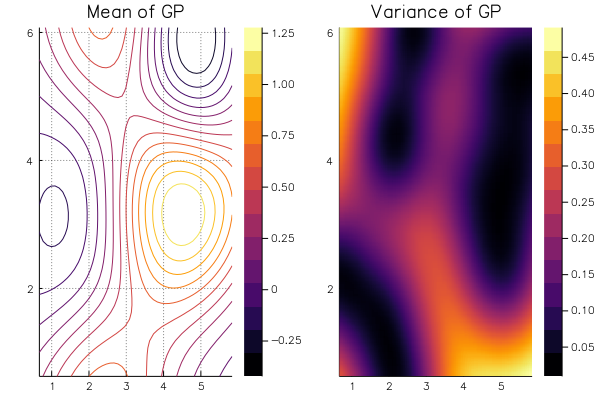

In [6]:
# Simulate data for 2D Gaussian process
X = 2π*rand(2, 10)
y = sin.(X[1,:]) .* cos.(X[2,:]) + 0.5*rand(10)
gp2 = GP(X,y,m,se)
# Plot mean and variance
p1 = plot(gp2; title="Mean of GP")
p2 = plot(gp2; var=true, title="Variance of GP", fill=true)
plot(p1, p2; fmt=:png)

Plots.jl has recipes for different types of two-dimensional plots including heatmaps, surfaces, contours and wireframes. The user can select the type of plot using the `seriestype` keyword, or the appropriate function name:


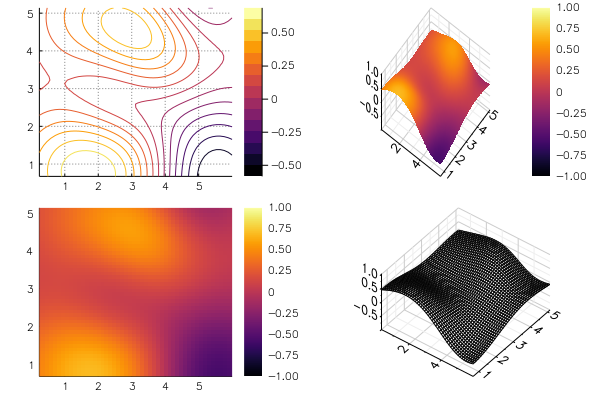

In [5]:
gr() # use GR backend to allow wireframe plot
p1 = contour(gp2)
p2 = surface(gp2)
p3 = heatmap(gp2)
p4 = wireframe(gp2)
plot(p1, p2, p3, p4; fmt=:png)